# Case Study: Credit Card Fraud Detection

We will use isolation forest algotithm to detect fraudulent credit card transactions. Dataset can be downloaded from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud/download

Latest h2o release

`pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o`

### Import and initialise h2o:

In [13]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ---------------------------------------------------------
H2O cluster uptime:         11 mins 18 secs
H2O cluster timezone:       Europe/Belgrade
H2O data parsing timezone:  UTC
H2O cluster version:        3.28.0.1
H2O cluster version age:    25 days
H2O cluster name:           H2O_from_python_ewaru_kyo7ge
H2O cluster total nodes:    1
H2O cluster free memory:    6.796 Gb
H2O cluster total cores:    12
H2O cluster allowed cores:  12
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:       {'http': None, 'https': None}
H2O internal security:      False
H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python version:             3.7.4 final
--------------------------  ---------------------------------------------------------

### Load data

In [2]:
from pathlib import Path
df = h2o.import_file('./creditcard.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


We can load the data straight into H2O Frame or convert pandas Data Frame into H2O Frame using `h2o.H2OFrame()`

### Look for outliers

### Autoencoder, Isolation Forest

In [15]:
ae = h2o.estimators.H2OAutoEncoderEstimator(hidden = [10, 10])
ae.train(y = 'Class', training_frame = df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [16]:
ae

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1578754617911_2


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 771 weights/biases, 23,8 KB, 2Â 897Â 384 training samples, mini-batch size 1


layer  units       type dropout l1 l2 mean_rate      rate_rms momentum  \
0        1     31      Input       0                                          
1        2     10  Rectifier       0  0  0   1.00422  1.09713e-154        0   
2        3     10  Rectifier       0  0  0   1.00422  1.09713e-154        0   
3        4     31  Rectifier          0  0   1.00422  1.09713e-154        0   

  mean_weight weight_rms mean_bias      bias_rms  
0                                                 
1   0.0122285   0.214468       0.5  1.09713e-154  
2  -0.0265016   0.332784         1  1.09713e-154  
3 -0.00945444   0.220662         0  1.09713e-154



ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.18663489280727394
RMSE: 0.43201260723186535

Scoring History: 


timestamp    duration   training_speed     epochs  iterations  \
0    2020-01-11 16:09:09   0.155 sec  0,00000 obs/sec   0.000000           0   
1    2020-01-11 16:09:14   5.152 sec   360111 obs/sec   6.315709          18   
2    2020-01-11 16:09:17   8.472 sec   348914 obs/sec  10.173149          29   
3    2020-01-11 16:09:17   8.487 sec   348746 obs/sec  10.173149          29   

     samples  training_rmse  training_mse  
0        0.0       0.432013  1.866349e-01  
1  1798758.0  142539.016785  2.031737e+10  
2  2897384.0  165683.128390  2.745090e+10  
3  2897384.0       0.432013  1.866349e-01


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0        V9             1.000000           1.000000    0.047400
1        V8             0.869199           0.869199    0.041200
2        V7             0.865575           0.865575    0.041028
3       V20             0.857001           0.857001    0.040622
4        V2             0.848614           0.848614    0.040224
5       V21             0.816474           0.816474    0.038701
6        V1             0.814053           0.814053    0.038586
7       V24             0.798777           0.798777    0.037862
8       V19             0.742778           0.742778    0.035207
9       V25             0.729400           0.729400    0.034573
10   Amount             0.683734           0.683734    0.032409
11      V14             0.677870           0.677870    0.032131
12      V22             0.675112           0.675112    0.032000
13      V27             0.659823           0.659823    0.031275
14       V6             0.658121           0.658121    0.031195
15      V11             0.653547           0.653547    0.030978
16      V18             0.651751           0.651751    0.030893
17    Class             0.646383           0.646383    0.030638
18      V26             0.645001           0.645001    0.030573
19      V17             0.643761           0.643761    0.030514


See the whole table with table.as_data_frame()


In [21]:
# bład odtworzenia Reconstruction.MSE
bledy = ae.anomaly(df)

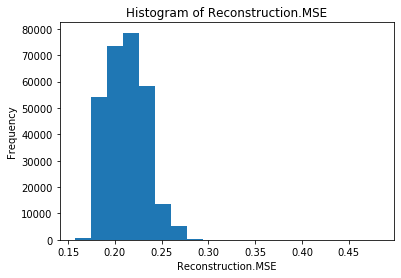

In [23]:
%matplotlib inline
bledy.hist()

In [24]:
bledy.max()

0.47405098490336706

In [26]:
bledy = bledy.as_data_frame()

In [28]:
import seaborn as sns

In [49]:
klasy = df[['Class', 'Amount']].as_data_frame()

In [31]:
import pandas as pd

In [50]:
wyniki = pd.concat([bledy, klasy], axis=1)

In [51]:
wyniki.groupby('Class').mean()

Reconstruction.MSE      Amount
Class                                
0                0.186484   88.291022
1                0.263010  122.211321

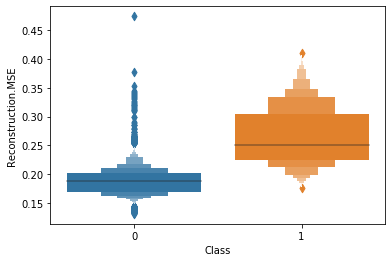

In [52]:
sns.boxenplot(x = "Class", y = 'Reconstruction.MSE', data = wyniki)

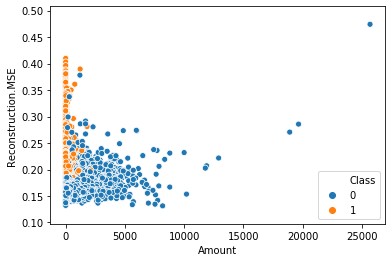

In [54]:
sns.scatterplot(x = 'Amount', y = 'Reconstruction.MSE', data = wyniki, hue = 'Class')

In [55]:
isolation = h2o.estimators.H2OIsolationForestEstimator()
isolation.train(y = 'Class', training_frame = df)

isolationforest Model Build progress: |███████████████████████████████████| 100%


In [58]:
isol = isolation.predict(df)

isolationforest prediction progress: |████████████████████████████████████| 100%


In [59]:
isol = isol.as_data_frame()

In [62]:
isol

predict  mean_length
0       0.034483         6.86
1       0.009852         6.96
2       0.118227         6.52
3       0.044335         6.82
4       0.068966         6.72
...          ...          ...
284802  0.576355         4.66
284803  0.083744         6.66
284804  0.083744         6.66
284805  0.142857         6.42
284806  0.113300         6.54

[284807 rows x 2 columns]

In [66]:
wyniki[isol.mean_length == isol.mean_length.min()]

Reconstruction.MSE  Class    Amount
274771            0.474051      0  25691.16